In [0]:
import sys
import gym
import numpy as np
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

In [0]:
env = gym.make('CliffWalking-v0')

In [0]:
# 4x12 gridworld
print(env.observation_space)
# up, down, left, right
print(env.action_space)

Discrete(48)
Discrete(4)


In [0]:
def Q_update(Qs, Qn, r, alpha, gamma):
  return Qs + (alpha * (r + (gamma * Qn) - Qs))

In [0]:
def epsilon_greedy(env, Qs, episode, eps=None):
  """
  General Epsilon Greedy policy for setting probabilities
  """
  epsilon = 1.0 / episode
  if eps is not None:
    epsilon = eps
  policy = np.ones(env.nA) * epsilon / env.nA
  policy[np.argmax(Qs)] = 1 - epsilon + (epsilon / env.nA)
  return policy

## Sarsa update

In [0]:
def sarsa(env, num_episodes, alpha, gamma=1.0):
  """
  Sarsa(0) update rule for Q values
  """
  Q = defaultdict(lambda : np.zeros(env.nA))
  scores = []
  for i in range(1, num_episodes):
    if i % 1000 == 0:
      print("Episode : {}".format(i))
    score = 0
    ctr = 0
    state = env.reset()
    policy = epsilon_greedy(env, state, i)
    action = np.random.choice(np.arange(env.nA), p=policy)
    # time steps per episode is 200
    while True:
      ctr += 1
      next_state, reward, done, _ = env.step(action)
      score += reward
      if not done:
        # Update policy greedy
        policy_upd = epsilon_greedy(env, Q[next_state], i)
        # Take action with greedy policy
        next_action = np.random.choice(np.arange(env.nA), p=policy_upd)
        # Update Q for current (state, action)
        Q[state][action] = Q_update(Q[state][action], Q[next_state][next_action], reward, alpha, gamma)
        # Set state=next_state
        state = next_state
        # Set action=next_action
        action = next_action
      if done:
        Q[state][action] = Q_update(Q[state][action], 0, reward, alpha, gamma)
        break
    scores.append(score / ctr)
  plt.plot(scores)
  return Q

Episode : 1000
Episode : 2000
Episode : 3000
Episode : 4000
[[ 1  1  1  1  1  1  1  2  1  1  2  2]
 [ 0  0  1  1  1  1  1  1  2  1  1  2]
 [ 0  0  0  0  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


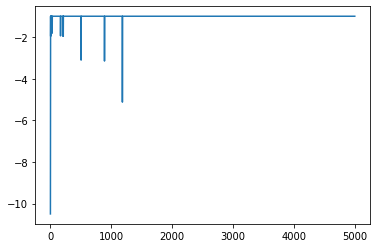

In [0]:
Q_sarsa = sarsa(env, 5000, 0.01)
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
#Q_sarsa = np.array([np.max(Q_sarsa[key] if key in Q_sarsa else 0 for key in np.arange(48))]).reshape(4, 12)
print(policy_sarsa)
#print(Q_sarsa)

## Sarsamax update

In [0]:
def sarsamax(env, num_episodes, alpha, gamma=1.0):
  """
  Sarsamax update rule for Q values
  """
  Q = defaultdict(lambda : np.zeros(env.nA))
  scores = []
  for i in range(1, num_episodes):
    if i % 1000 == 0:
      print("Episode : {}".format(i))
    score = 0
    ctr = 0
    state = env.reset()
    while True:  
      ctr += 1
      # Get epsilon greedy policy
      policy = epsilon_greedy(env, Q[state], i)
      # Pick next action
      action = np.random.choice(np.arange(env.nA), p=policy)
      # Take a step
      next_state, reward, done, _ = env.step(action)
      # Add reward to score
      score += reward
      # Update the Q value
      Q[state][action] = Q_update(Q[state][action], np.max(Q[state]), reward, alpha, gamma)
      state = next_state
      if done:
        break
    scores.append(score / ctr)
  plt.plot(scores)
  return Q

Episode : 1000
Episode : 2000
Episode : 3000
Episode : 4000


array([[ 0,  2,  0,  2,  3,  0,  0,  3,  0,  2,  3,  1],
       [ 0,  1,  3,  0,  1,  1,  1,  2,  3,  2,  2,  1],
       [ 0,  3,  3,  3,  0,  1,  3,  1,  0,  1,  1,  0],
       [ 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

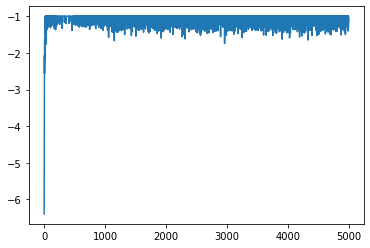

In [0]:
Q_sarsamax = sarsamax(env, 5000, 0.01)
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape(4,12)
policy_sarsamax

## Expected Sarsa

The update rule changes in the for loop :

Q[state][action] = Q_update(Q[state)[action], np.dot(Q[next_state], policy), reward, alpha, gamma)

In [0]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
  """
  Expected Sarsa update rule for Q values
  """
  Q = defaultdict(lambda : np.zeros(env.nA))
  scores = []
  for i in range(1, num_episodes):
    if i % 1000 == 0:
      print("Episode : {}".format(i))
    score = 0
    ctr = 0
    state = env.reset()
    while True: 
      ctr += 1
      # Get epsilon greedy policy
      policy = epsilon_greedy(env, Q[state], i)
      # Pick next action
      action = np.random.choice(np.arange(env.nA), p=policy)
      # Take a step
      next_state, reward, done, _ = env.step(action)
      # Add reward to score
      score += reward
      # Update the Q value
      Q[state][action] = Q_update(Q[state][action], np.dot(Q[next_state], policy), reward, alpha, gamma)
      state = next_state
      if done:
        break
    scores.append(score / ctr)
  plt.plot(scores)
  return Q

Episode : 1000
Episode : 2000
Episode : 3000
Episode : 4000


array([[ 0,  2,  0,  1,  0,  0,  1,  1,  1,  1,  0,  2],
       [ 3,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0]])

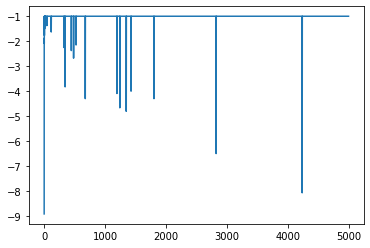

In [0]:
Q_expected_sarsa = expected_sarsa(env, 5000, 0.01)
policy_expected_sarsa = np.array([np.argmax(Q_expected_sarsa[key]) if key in Q_expected_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
policy_expected_sarsa

## Difference between algorithms
*   Sarsa and Epected Sarsa are on-policy TD algorithms, the same policy is evaluated and improved.
*   Sarsamax is an off-policy, the greedy policy is evaluated and improved different from $\epsilon$-greedy policy that is used to select actions.
*   On-policy TD control methods have better online performance than off-policy TD control methods.




